## Machine Learning Project - Predict Heart Disease

### Data Science / Machine Learning Project Life Cycle

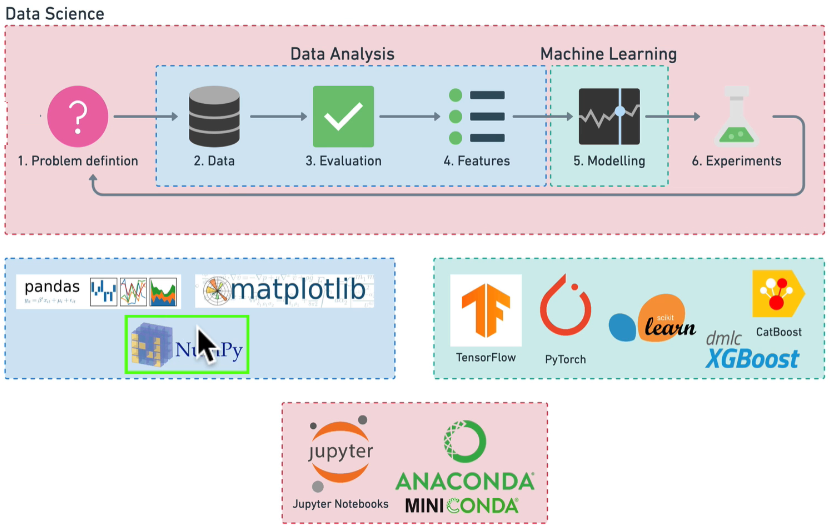

#### Problem Definition:
In this project we are going to build an end-to-end machine learning model to predict if someone has heart disease or not. We are going to use a  dataset with 1025 records with 12 columns or features of various health indicators of patients and whether the patient has heart disease or not. 

<a id="p"></a>
### Project Steps:

1. [Exploratory Data Analysis](#m1)
2. [Choose the right model for the given problem](#m2)
3. [Train the model with data](#m3)
4. [Evaluate performance of the model](#m4)
5. [Tune to improve the performance of the model](#m5)
6. [Find the most important features in our dataset](#m6)

<a id="m1"></a>
### Module 1 - Exploratory Data Analysis / EDA
In this step we will perform the following tasks -
* [Import data from the source file into pandas dataframe](#m1_s1)
* [Analyze the dataframe](#m1_s2)
* [Identify patterns and outlier in the data](#m1_s3)
* [Transform value of one or more columns (if necessary)](#m1_s4)
* [Handle missing value in the dataframe (if necessary)](#m1_s4)
* [Handle categorical features (if necessary)](#m1_s5)

<a id="m1_s1"></a>
#### Import data from the source file into pandas dataframe

In [1]:
# import pandas library
import pandas as pd

In [2]:
# Import the data into dataframe
hd_v1 = pd.read_csv("data/heart-disease.csv")

<a id="m1_s2"></a>
#### Analyze the dataframe
Here we will review the dataframe, see some sample records, check the data types of the columns and also analyze the type of data in each columns.

In [3]:
# Check first few records of the dataframe
hd_v1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Data Dictionary

- **age**: age in years
- **sex**: sex (1 = male; 0 = female)
- **cp**: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality; 2: showing probable or definite left ventricular hypertrophy)
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **target**: diagnosis of heart disease

In [4]:
# Check the datatypes of each column
hd_v1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Check the size of the dataframe
print("Number of records in the dataframe: ", hd_v1.shape[0])
print("Number of columns in the dataframe: ", hd_v1.shape[1])

Number of records in the dataframe:  1025
Number of columns in the dataframe:  14


[Go to the top of the module](#m1)
<a id="m1_s3"></a>
#### Identify patterns and outlier in the data
In this step we will inspect all numeric features which are continuous in nature, such as age or trestbps (resting blood pressure) to see how the data in those columns are distributed and whether any of those features have outliers.

In [6]:
# Let's see the statistical info of the 5 columns through pandas describe function
hd_v1[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [7]:
# Let's check the values of oldpeak column to make sure it's not categorical
hd_v1['oldpeak'].value_counts()

oldpeak
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: count, dtype: int64

##### Plot distribution of numeric variables
From the result of the describe function above we see some important aspects of the numeric features, such as mean, median, standard deviation, etc. However we would like to visualize the distribution of those variables in plot

In [8]:
# Import library
%matplotlib inline
import matplotlib.pyplot as plt

##### Histogram

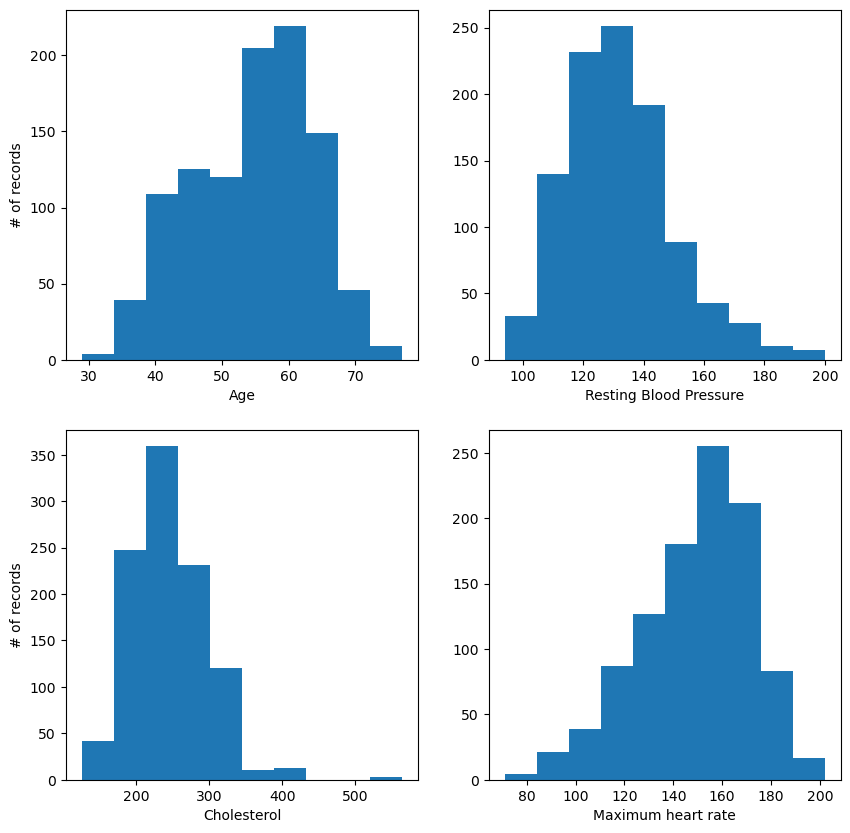

In [9]:
# Create the layout
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Plot the graph
ax[0, 0].hist(hd_v1['age']);
ax[0, 0].set(xlabel="Age",ylabel="# of records");
ax[0, 1].hist(hd_v1['trestbps']);
ax[0, 1].set(xlabel="Resting Blood Pressure");
ax[1, 0].hist(hd_v1['chol']);
ax[1, 0].set(xlabel="Cholesterol",ylabel="# of records");
ax[1, 1].hist(hd_v1['thalach']);
ax[1, 1].set(xlabel="Maximum heart rate");

By observing the histogram of the 4 numeric features we see that they follow close to normal distribution pattern and have few outliers. Such as few records having cholesterol above 500.

##### Scatterplot
Now we will draw scatterplot of the 4 categorical features to see how they are distributed with respect to the age feature.

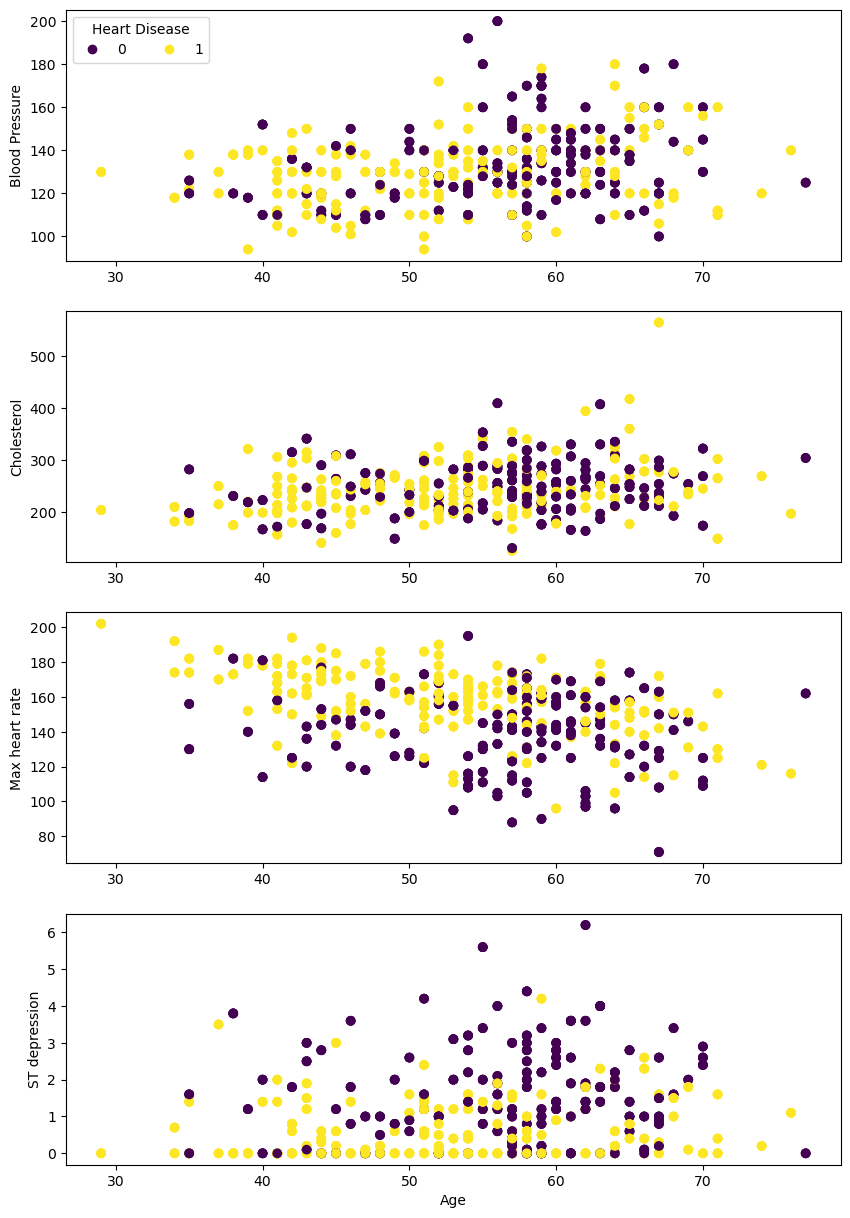

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
s1 = ax[0].scatter(x=hd_v1['age'], y=hd_v1['trestbps'], c=hd_v1['target'])
ax[0].set(ylabel="Blood Pressure")
ax[0].legend(*s1.legend_elements(), title="Heart Disease", ncol=2, loc="upper left")

ax[1].scatter(x=hd_v1['age'], y=hd_v1['chol'], c=hd_v1['target'])
ax[1].set(ylabel="Cholesterol")

ax[2].scatter(x=hd_v1['age'], y=hd_v1['thalach'], c=hd_v1['target'])
ax[2].set(ylabel="Max heart rate")

ax[3].scatter(x=hd_v1['age'], y=hd_v1['oldpeak'], c=hd_v1['target'])
ax[3].set(xlabel="Age", ylabel="ST depression");

##### Correlation Heatmap

In [11]:
# Import seaborn library
import seaborn as sns

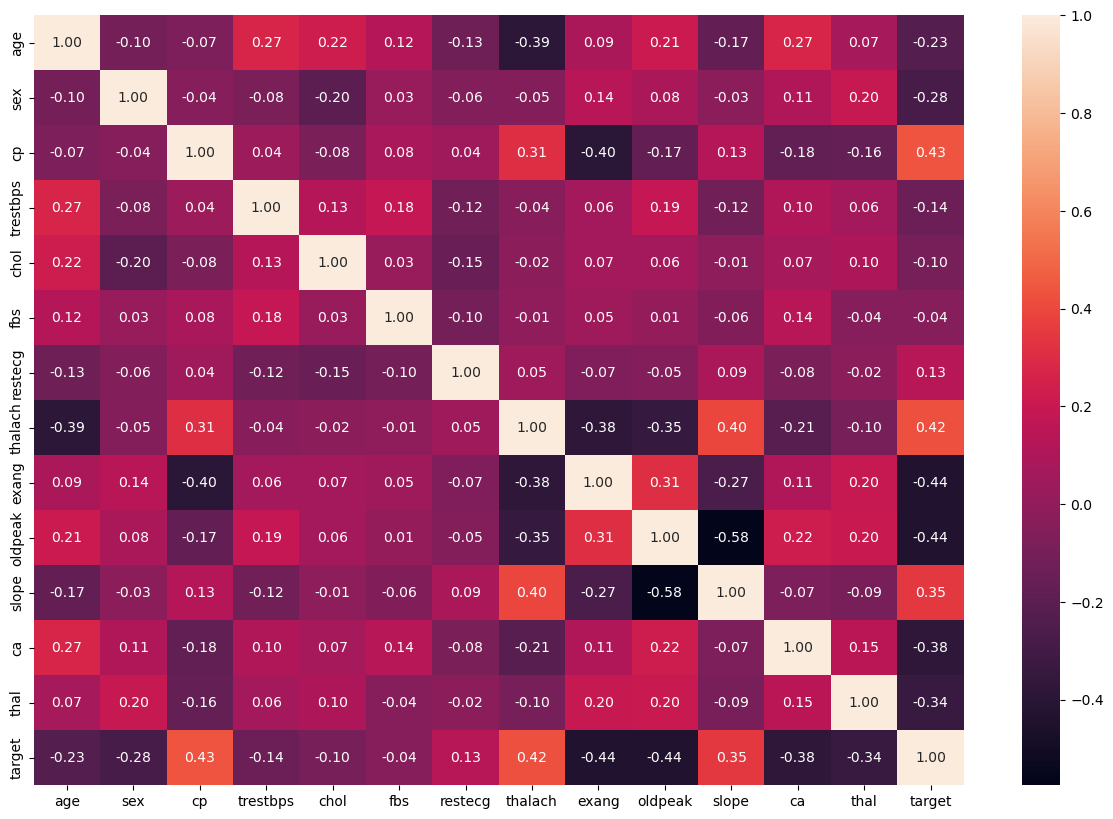

In [12]:
corr_matrix = hd_v1.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt=".2f"
                )

So from the above correlation coefficient, we see that **cp** and **thalach** have positive correlation with the target variable with correlation coefficient as **0.43** and **0.44** respectively. On the other hand, the **exang** and **oldpeak** have negative correlation with the target variable with both features having correlation coefficient as **-0.44**. We already saw the relationship between thalach with heart disease and oldpeak with heart disease in the scatterplots above. Now let's see the relation of heart disease with **cp** and **exang**.

In [13]:
# Relationship via cross tab between cp and target

pd.crosstab(hd_v1['cp'], hd_v1['target'], normalize='index').round(4)*100

target,0,1
cp,,
0,75.45,24.55
1,19.76,80.24
2,22.89,77.11
3,33.77,66.23


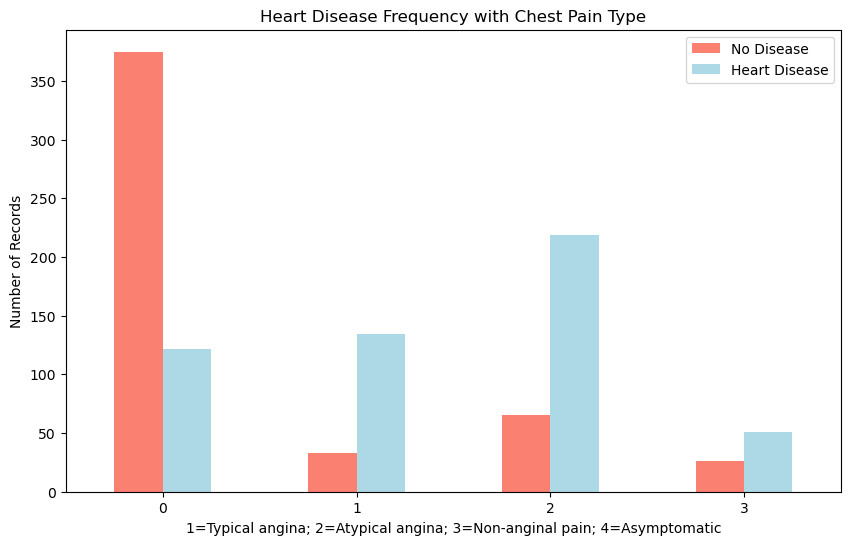

In [14]:
pd.crosstab(hd_v1['cp'], hd_v1['target']).plot(kind='bar',
                                               figsize=(10,6),
                                               color=['salmon','lightblue'])
plt.title("Heart Disease Frequency with Chest Pain Type")
plt.xlabel("1=Typical angina; 2=Atypical angina; 3=Non-anginal pain; 4=Asymptomatic")
plt.ylabel("Number of Records")
plt.legend(["No Disease","Heart Disease"])
plt.xticks(rotation=0);

In [15]:
# Relationship via cross tab between exang and target

pd.crosstab(hd_v1['exang'], hd_v1['target'], normalize='index').round(4)*100

target,0,1
exang,,
0,33.09,66.91
1,79.42,20.58


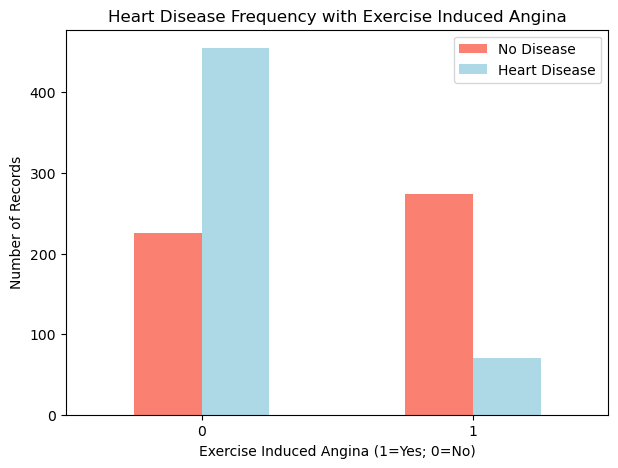

In [16]:
pd.crosstab(hd_v1['exang'], hd_v1['target']).plot(kind='bar'
                                                 ,figsize=(7,5)
                                                 ,color=['salmon','lightblue']
                                                 )
plt.title("Heart Disease Frequency with Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina (1=Yes; 0=No)")
plt.ylabel("Number of Records")
plt.legend(["No Disease","Heart Disease"])
plt.xticks(rotation=0);

[Go to the top of the module](#m1)
<a id="m1_s4"></a>
#### Transform value of one or more columns
After inspecting the dataframe we see that the columns have right values in it and hence need no transformation, like splitting, merging, creating new column, etc. So we can move to the next section.
#### Handle missing value in the dataframe

In [17]:
hd_v1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We see that there is no null / missing value in the dataframe, so we will proceed to the next step.

[Go to the top of the module](#m1)
<a id="m1_s5"></a>
#### Handle categorical columns / features
Though all columns in the dataframe have numeric data type, from the data definition above we suspect that some of the columns have categorical values. Let's inspect the values in those columns.

In [18]:
# Get the distribution of categorical columns

cat_cols = [1,2,5,6,8,10,11,12,13]

for i in cat_cols:
    print("Distribution of values in categorical column name: ", hd_v1.columns[i])
    print(hd_v1[[hd_v1.columns[i]]].value_counts())
    print("")

Distribution of values in categorical column name:  sex
sex
1      713
0      312
Name: count, dtype: int64

Distribution of values in categorical column name:  cp
cp
0     497
2     284
1     167
3      77
Name: count, dtype: int64

Distribution of values in categorical column name:  fbs
fbs
0      872
1      153
Name: count, dtype: int64

Distribution of values in categorical column name:  restecg
restecg
1          513
0          497
2           15
Name: count, dtype: int64

Distribution of values in categorical column name:  exang
exang
0        680
1        345
Name: count, dtype: int64

Distribution of values in categorical column name:  slope
slope
1        482
2        469
0         74
Name: count, dtype: int64

Distribution of values in categorical column name:  ca
ca
0     578
1     226
2     134
3      69
4      18
Name: count, dtype: int64

Distribution of values in categorical column name:  thal
thal
2       544
3       410
1        64
0         7
Name: count, dtype: int64

##### One-Hot Encoding

We are going to create a copy of the dataframe and apply OneHot encoding to all these categorical variable except the target variable. We will use both dataframes (one with original values and another with OneHot encoding) on our machine learning models to see which one gives us better result.

In [19]:
# Import library
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")

# Get the list of columns with categorical values
cat_cols = [1,2,5,6,8,10,11,12]
cat_col_names = []
hd_v2 = hd_v1.copy()

for i in cat_cols:
    col_name = hd_v1.columns[i]
    cat_col_names.append(hd_v1.columns[i])
    
    feature_array = ohe.fit_transform(hd_v1[[col_name]]).toarray()
    feature_labels = ohe.get_feature_names_out()
    
    # Create a temporary dataframe encoding the specific column
    temp_df = pd.DataFrame(feature_array, columns=feature_labels)
    
    # Combine the temporary dataframe into the main dataframe
    hd_v2 = pd.concat([hd_v2, temp_df], axis=1)
    
    # Drop the original categorical column from the main dataframe
    hd_v2.drop(columns=[col_name], inplace=True)

pd.options.display.max_columns = None
hd_v2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53,140,203,155,3.1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70,145,174,125,2.6,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61,148,203,161,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,138,294,106,1.9,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


[Go to the project index](#p)

<a id="m2"></a>
### Module 2 - Choose the right model for the given problem

The objective of Machine Learning is to find the right model or algorithm to train the given dataset, so that the model can predict the accurate (or near accurate) outcome on unknown data. Sckikit-learn documentation provides an excellent map (below), which can also be found at https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. We will use this map to narrow down few models and then run experiments with each of those models on our dataset to see which model performs the best. 

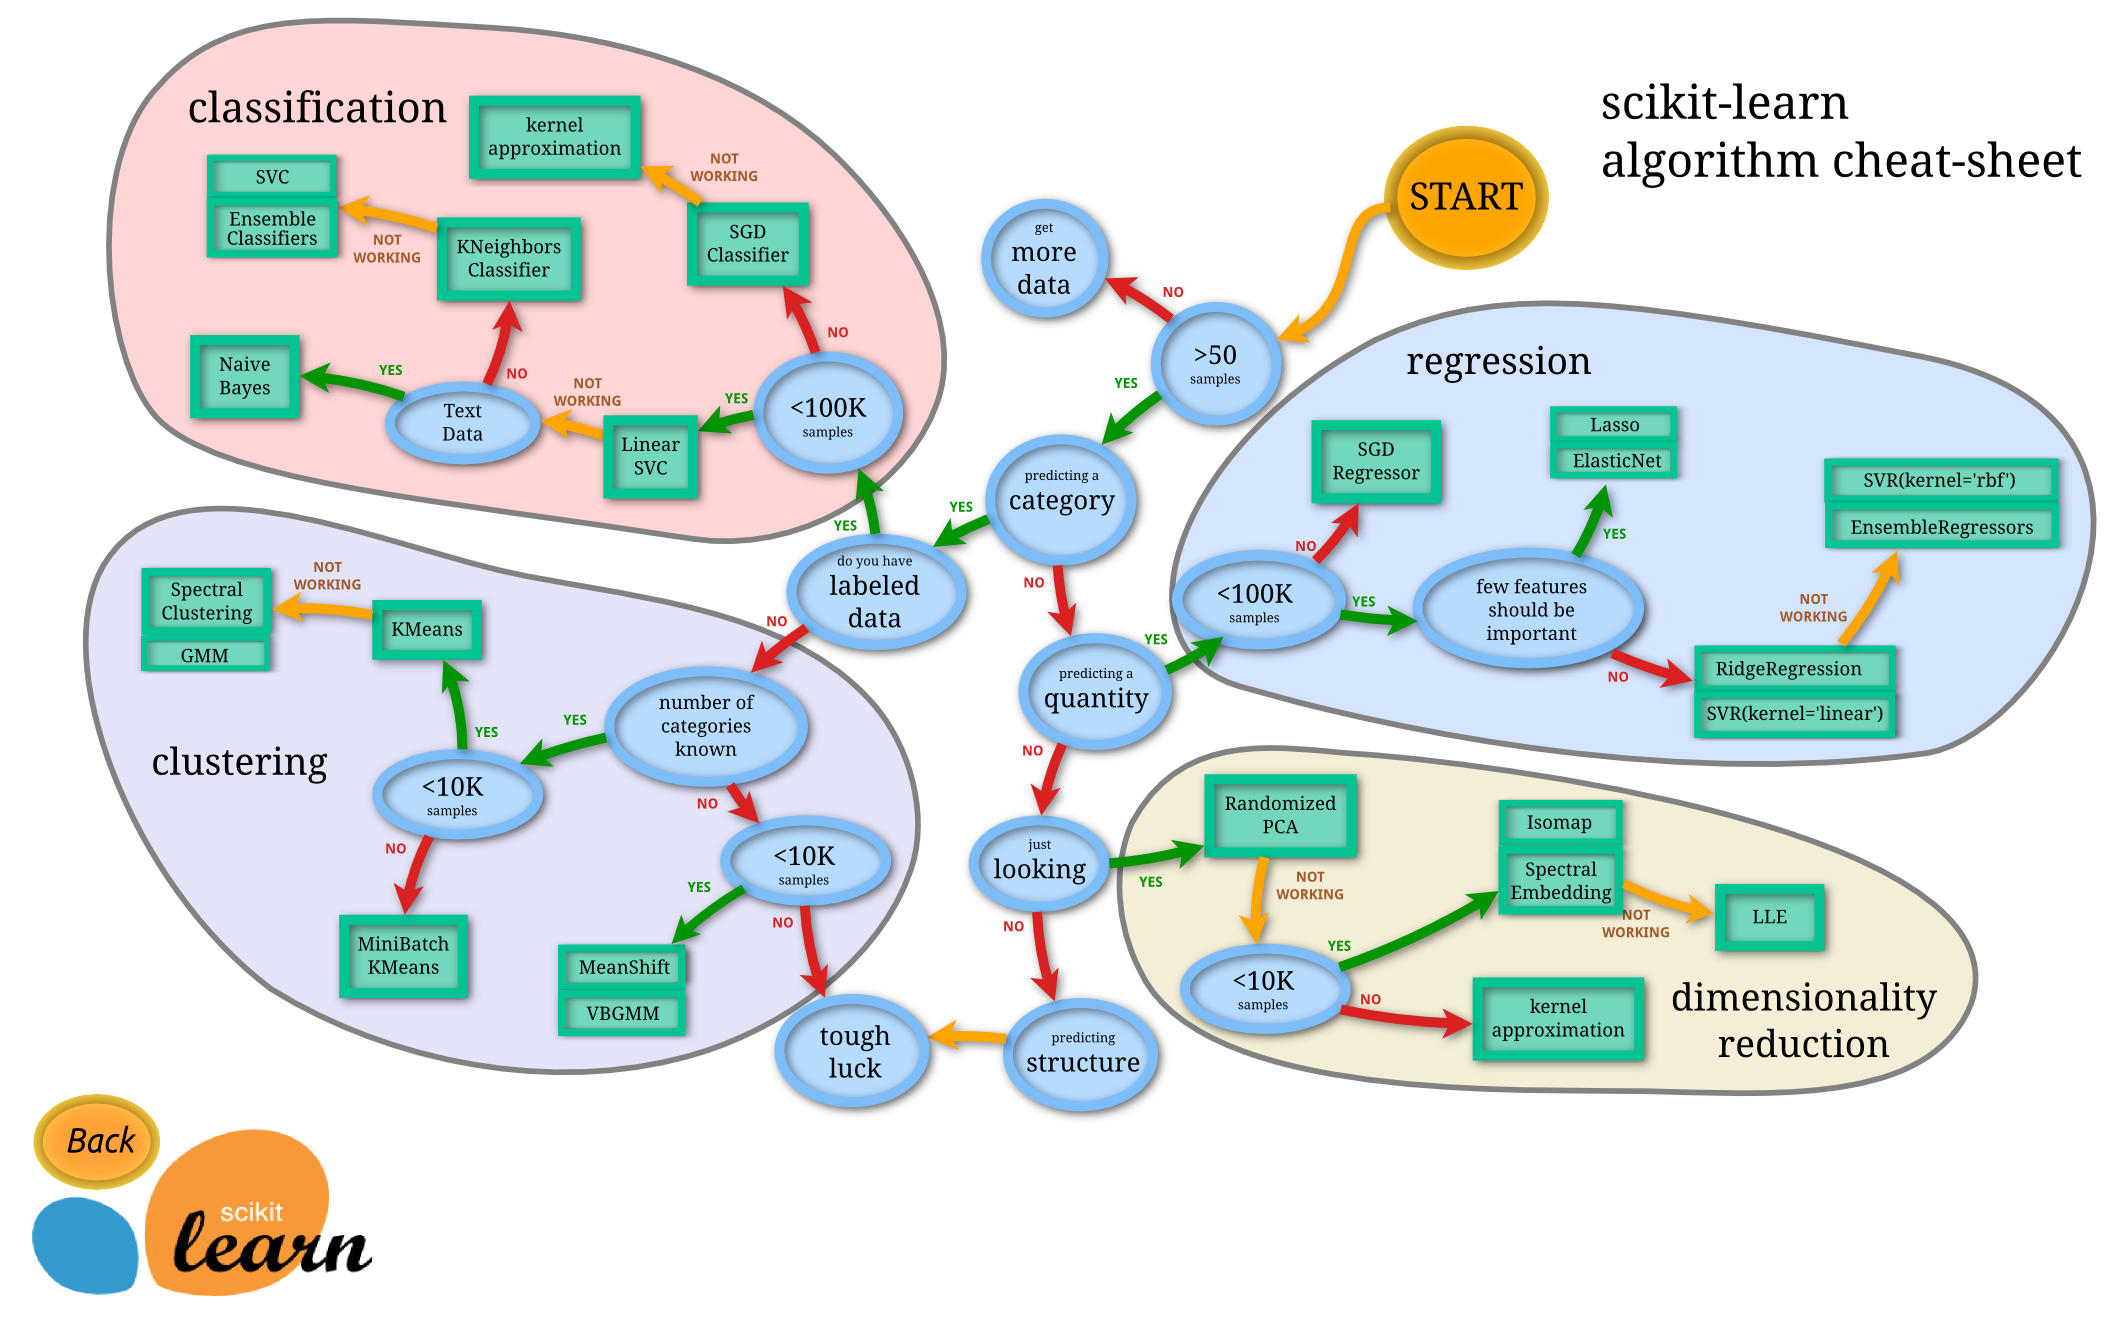

#### Navigate through the scikit-learn map to identify the right machine learning model

* Do we have more than 50 samples? **Yes**. ```hd_v1.shape[0]``` = 1025
* What category of problem we are trying to solve? **Classification**, because we are trying to predict whether someone has heart disease or not which is a yes/no or boolian variable.
* Do we have less than 100K samples? **Yes**.
* Do we have text data? **No**. 

We would like to select multiple machine learning models such as **Linear SVC**, **KNeighbors Classifier**, **Logistic Regression** (which is infact a classification model) and **Random Forest Classifier** to experiment with both of our datasets and pick the model and the dataset which gives the best result. 


[Go to the project index](#p)

<a id="m3"></a>
### Module 3 - Train the model with data

In [20]:
# Import necessary libraries
import numpy as np

# For data preparation
from sklearn.model_selection import train_test_split

# For model selection
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Data preparation

# Let's set a numpy random seed so we can reproduce the same result every time we run the process
np.random.seed(42)

# From the first dataframe
X1 = hd_v1.drop(columns=['target'])
y1 = hd_v1['target']

# From the second dataframe
X2 = hd_v2.drop(columns=['target'])
y2 = hd_v2['target']

# Split data into separate train (80%) and test (20%) sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [22]:
X1_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [23]:
X2_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
137,64,180,325,154,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69,62,160,164,145,6.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
349,62,130,263,97,1.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
487,65,135,254,127,2.8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
330,37,120,215,170,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Create a function to evaluate each of the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Create a random seed
    np.random.seed(42)
    
    # Create empty dictionary to store the score of each model separately for training and test dataset
    model_scores_train = {}
    model_scores_test = {}
    
    for name, model in models.items():
        # Fit the model with training data
        model.fit(X_train, y_train)
        model_scores_train[name] = model.score(X_train, y_train)
        model_scores_test[name] = model.score(X_test, y_test)
    
    return model_scores_train, model_scores_test


In [25]:
# Run the models on the first dataset and see the score 

# Create dictionary for all models we would like to experiemnt with
models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "LogisticRegression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}


model_scores_train_1, model_scores_test_1 = fit_and_score(models = models,
                                                          X_train = X1_train, 
                                                           X_test = X1_test, 
                                                           y_train = y1_train, 
                                                           y_test = y1_test)

print("Model score on training data of the first dataset:")
print(model_scores_train_1)
print()
print("Model score on test data of the first dataset:")
print(model_scores_test_1)

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model score on training data of the first dataset:
{'LinearSVC': 0.802439024390244, 'KNN': 0.9231707317073171, 'LogisticRegression': 0.8658536585365854, 'Random Forest': 1.0}

Model score on test data of the first dataset:
{'LinearSVC': 0.7707317073170732, 'KNN': 0.7317073170731707, 'LogisticRegression': 0.7853658536585366, 'Random Forest': 0.9853658536585366}


In [26]:
# Run the models on the second dataset and see the score 

models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "LogisticRegression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}

model_scores_train_2, model_scores_test_2 = fit_and_score(models = models,
                                                         X_train = X2_train, 
                                                          X_test = X2_test, 
                                                          y_train = y2_train, 
                                                          y_test = y2_test)

print("Model score on training data of the second dataset:")
print(model_scores_train_2)
print()
print("Model score on test data of the second dataset:")
print(model_scores_test_2)

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model score on training data of the second dataset:
{'LinearSVC': 0.7439024390243902, 'KNN': 0.9146341463414634, 'LogisticRegression': 0.8829268292682927, 'Random Forest': 1.0}

Model score on test data of the second dataset:
{'LinearSVC': 0.7024390243902439, 'KNN': 0.7024390243902439, 'LogisticRegression': 0.8536585365853658, 'Random Forest': 1.0}


C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Note on KNN model with sklearn version
Initially when we run the above command we got error saying *AttributeError: 'Flags' object has no attribute 'c_contiguous'* and that error is coming while executing the KNN model on dataset 2 (the dataset with OneHot encoded columns). Upon researching in internet we found that the error comes when the version of scikit_learn is 1.3.0, which was in our case. As suggested, we downgraded the scikit_learn version to **1.2.2** and that fixed the error.

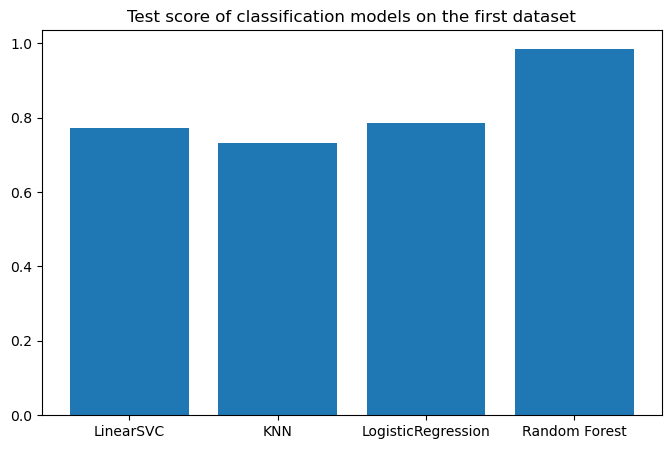

In [27]:
# Let's visualize the test score of all models on the first dataset

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(model_scores_test_1.keys(), model_scores_test_1.values())
ax.set(title="Test score of classification models on the first dataset");

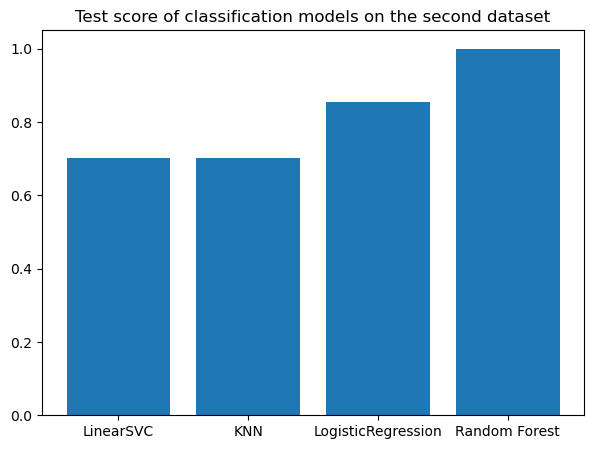

In [28]:
# Let's visualize the test score of all models on the second dataset

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(model_scores_test_2.keys(), model_scores_test_2.values())
ax.set(title="Test score of classification models on the second dataset");

##### Analyze result of model scores
The model scores we see as the result of the code above shows the average or mean **accuracy** of the model on the given dataset. **Accuracy** is the total number of correct prediction made by the model divided by the total number of records on the given dataset. It is one of the most common evaluation criteria for classification machine learning problemsBased on the test score of various models above on both training and more importantly on test dataset, we can make following observations -
- First observation we can make is the test score on both training and test dataset improves on the second dataset over the first dataset. The second dataset is where we used **OneHot Encoding** on many of the categorical features and hence the second dataset has more columns. Whereas on the first dataset we used **Label Encoding** for those categorical features resulting the dataset having comparatively less number of columns. This confirms the theory that in most of the cases use of OneHot Encoding produces better performance from machine learning model.
- The score of Random Forest model on both dataset is exceptionally high. It's producing 98.5% accuracy on the first dataset and 100% on the second dataset, which is the ideal score. While that should make us thrilled that we found our best model, however we rather be suspicious that the result may be due to **overfitting**. So we will need to run the model on different sets of test data to make sure.
- The score of Logistic Regression improved from 78.5% on the first dataset to 85.4% on the second dataset. As 85% is a good baseline score, we would like to further explore Logistic Regression model on the second dataset and see if we can improve the score by doing **hyperparameter tuning**.

*Note*: The warnings in the output of the above two model scoring steps are because of some setting of hyperparameters. We expect to get those fixed when we do the hyperparameter tuning in next steps.

[Go to the project index](#p)

<a id="m4"></a>
### Module 4 - Evaluate performance of the model
In the previous module where we trained the models with both of the datasets, we saw the result of how the models performed through `score` function, which indicates the accuracy score of the model, in other words how many times the model predicted the right outcome with respect to the number of records in the dataset. Though accuracy score is an important indicator of model performance, there are other important indicators to evaluate the performance of classification models. In this section we all those indicatiors as follows -
- Accuracy Score
- Precision Score
- Recall Score
- F1 Score
- Confusion Metrics
- Receiver Operating Characteristic (ROC) Curve
- Area Under Curve (AUC)

In [40]:
# Import necessary libraries

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
# Create a function to evaluate all performance indicators for each of the models

def fit_and_evaluate(models, df, X_train, X_test, y_train, y_test):
    # Create random seed
    np.random.seed(42)
    
    row_index = 0
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        df.loc[row_index, 'Model'] = name
        
        train_accuracy = model.score(X_train, y_train)
        df.loc[row_index, 'Train_Accuracy'] = round(train_accuracy, 4)
        
        test_accuracy = model.score(X_test, y_test)
        df.loc[row_index, 'Test_Accuracy'] = round(test_accuracy, 4)
        
        pred = model.predict(X_test)
        precision = precision_score(y_test, pred)
        df.loc[row_index, 'Precision_Score'] = round(precision, 4)
        
        recall = recall_score(y_test, pred)
        df.loc[row_index, 'Recall_Score'] = round(recall, 4)
        
        f1 = f1_score(y_test, pred, average='weighted')
        df.loc[row_index, 'F1_Score'] = round(f1, 4)
        
        auc = roc_auc_score(y_test, pred)
        df.loc[row_index, 'Area_Under_Curve'] = round(auc, 4)
        
        row_index = row_index + 1
        
    return df

In [35]:
# Run the models on the first dataset and see the evaluation result 

models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "LogisticRegression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}

# Create an empty dataframe to pass to the function
col = []
df = pd.DataFrame(columns=col)

model_eval_df1 = fit_and_evaluate(models = models,
                                 df = df,
                                 X_train = X1_train,
                                 X_test = X1_test,
                                 y_train = y1_train,
                                 y_test = y1_test
                                 )

model_eval_df1.head()

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train_Accuracy,Test_Accuracy,Precision_Score,Recall_Score,F1_Score,Area_Under_Curve
0,LinearSVC,0.8024,0.7707,0.7059,0.9320,0.7644,0.7699
1,KNN,0.9232,0.7317,0.7308,0.7379,0.7317,0.7317
2,LogisticRegression,0.8659,0.7854,0.7438,0.8738,0.7836,0.7849
3,Random Forest,1.0000,0.9854,1.0000,0.9709,0.9854,0.9854


In [36]:
# Run the models on the second dataset and see the evaluation result 

models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "LogisticRegression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}

# Create an empty dataframe to pass to the function
col = []
df = pd.DataFrame(columns=col)

model_eval_df1 = fit_and_evaluate(models = models,
                                 df = df,
                                 X_train = X2_train,
                                 X_test = X2_test,
                                 y_train = y2_train,
                                 y_test = y2_test
                                 )

model_eval_df1.head()

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train_Accuracy,Test_Accuracy,Precision_Score,Recall_Score,F1_Score,Area_Under_Curve
0,LinearSVC,0.7439,0.7024,0.6258,1.0000,0.6741,0.7039
1,KNN,0.9146,0.7024,0.6990,0.7059,0.7024,0.7025
2,LogisticRegression,0.8829,0.8537,0.8273,0.8922,0.8535,0.8538
3,Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


##### Confusion Metrics & ROC Curve
We used the fit and evaluate method above to produce various evaluation scores of multiple models in a nice little dataframe, that helped us making our code modular and simpler. However due to that we couldn't draw the Confusion Metrics & ROC Curve. So now we will do that using Logistic Regression model on our second dataset.

In [46]:
# Create a random seed
np.random.seed(42)

# Create a Logistic Regression model and fit on the test data
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Predict using the model
y2_pred = model.predict(X2_test)

# Calculate the True and False Positive Rates (TPR & FPR)
pred_prob = model.predict_proba(X2_test)
pred_prob = pred_prob[:, 1]


C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Confusion Metrics
Here we will calculate the confusion metrics and then plot that in heatmap for easier understanding. The confusion metrics tells how our binary classification model performed the following -
- True Negative (Model predicts no heart disease where there is no heart disease) (top-left cell on the metrics)
- False Negative (Model predicts no heart disease where there actually heart disease) (top-right cell on the metrics)
- False Positive (Model predicted heart disease where there is no heart disease) (bottom-left cell on the metrics)
- True Positive (Model predicts heart disease when there is actually heart disease) (bottom-right cell on the metrics)

In [48]:
conf = confusion_matrix(y2_test, y2_pred)
print(conf)

[[84 19]
 [11 91]]


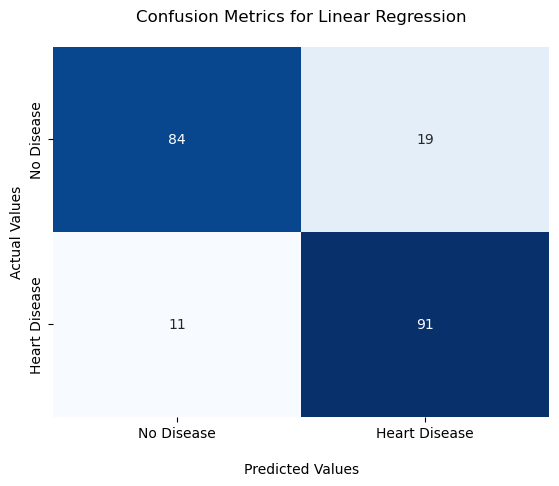

In [56]:
# Draw the plot using heatmap function of Seaborn library imported earlier above
ax = sns.heatmap(conf, annot=True, cmap='Blues', cbar=False)

# Set title and axis labels
ax.set_title("Confusion Metrics for Linear Regression\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")

# Set the tick marks
ax.xaxis.set_ticklabels(['No Disease', 'Heart Disease'])
ax.yaxis.set_ticklabels(['No Disease', 'Heart Disease'])

plt.show;

##### ROC Curve
ROC curve gives a visual representation of how well our model can predict both true positive and true negative and it is commonly used as an evaluation metrics for binary classification, such as in our case of predicting whether someone will have heart disease or not. If the ROC curve is diagonal then that represents that the model is only as good as random prediction. If the ROC curve is on the top-left side then it indicates the model has performed better than random prediction, whereas if the ROC curve is on the bottom-right side then it indicates the model has performed poorer than random prediction. The **Area Under Curve (AUC)** indicates the area under the ROC curve, which we have calculated above. AOC is 0.5 for random prediction for binary classification. AUC value 1 indicates that the model is perfect to predict both true positive and true negative in all the cases.

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


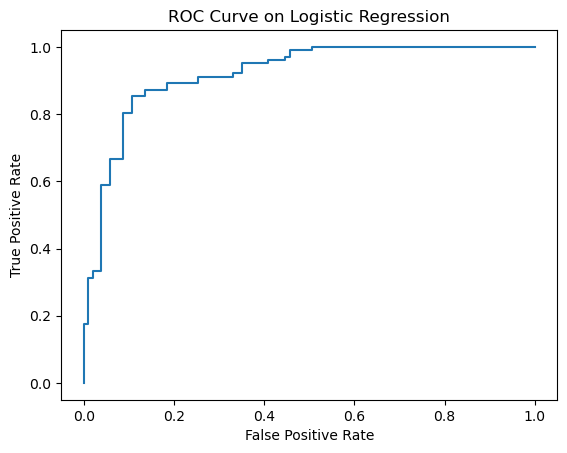

In [44]:
# Calculate the True and False Positive Rates (TPR & FPR)
tpr, fpr, threshold = roc_curve(y2_test, pred_prob)

# Plot the ROC curve on the model
plt.plot(tpr, fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve on Logistic Regression");

[Go to the project index](#p)

<a id="m5"></a>
### Module 5 - Tune to improve the performance of the model
In this section we are going to perform **hyperparameter tuning** using **RandomizeSearchCV** on logistic regression and random forest model. When we ran the models above to train on the training dataset and test on the test datasets, we used the models with their default parameter settings. Now the default parameters are set to work on most cases and gave us good result. However we would like to explore if tuning one or more parameters of the models can improve the performance and gives us better result. **RandomizeSearchCV** also uses cross validation, meaning it uses different splits of training and test data to evaluate the model instead of using just one set of train and test data as we did before. This gives better confidence on the result of the model and also can overcome the overfitting / underfitting problem that we saw above with the random forest model.

##### Hyperparameter Tuning for Logistic Regression using GridSearchCV

In [57]:
# Import necessary library
from sklearn.model_selection import GridSearchCV

# Create a hyperparameter grid for Logistic Regression
param_grid = {"C" : np.logspace(-2, 2, 20),
              "solver" : ["newton-cg", "lbfgs", "liblinear", "saga"],
              "penalty" : ['l2']
             }

# Define the grid search cv for logistic regression
gs_lr = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=param_grid,
                     cv=5
                    )

# Fit the model with the training data from the second dataset
gs_lr.fit(X2_train, y2_train)

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs fa

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']})

In [58]:
# Find the best parameters
gs_lr.best_params_

{'C': 0.11288378916846889, 'penalty': 'l2', 'solver': 'lbfgs'}

In [61]:
# Find the accuracy score of the model
gs_lr.score(X2_test, y2_test)

0.8536585365853658

So from the above accuracy score we see that it didn't improve from the accuracy score we got from the default Logistic Search, which tells that the default settings of Logistic Search model is working good with our dataset.

[Go to the project index](#p)

<a id="m6"></a>
### Module 6 - Find the most important features in our dataset
In this module we will find which features of our dataset influenced most to the performance of our machine learning model. So that we can evaluate any future data to make sure the data has those useful features before we run our model. To find the most important features, we will again run the logistic regression model with default hyperparameter settings on our second dataset, the one with onehot encoding as we got better performance out of that.

In [63]:
# Set random seed
np.random.seed(42)

# Instantiate the model and fit with training data
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Find feature importance
feature_imp = model.coef_

C:\Users\ashim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
feature_imp

array([[ 0.02060253, -0.02435319, -0.0042541 ,  0.02467742, -0.4366401 ,
         0.91110954, -0.93985938, -1.11296789, -0.19043988,  0.65496009,
         0.61969784, -0.03779513,  0.00904528, -0.24857007,  0.32180394,
        -0.10198371,  0.37361873, -0.40236857,  0.12801881, -0.55413437,
         0.39736572,  1.55353628, -0.35747146, -1.24132279, -0.54879534,
         0.56530346, -0.24589135,  0.55635259,  0.51198657, -0.85119765]])

In [74]:
# Create a dictionary with column names and their corresponding feature importance
feature_dict = dict(zip(X2_train.columns, list(feature_imp[0])))
feature_dict

{'age': 0.020602533506626816,
 'trestbps': -0.024353185520694078,
 'chol': -0.004254095242443054,
 'thalach': 0.024677421498878534,
 'oldpeak': -0.43664009722590763,
 'sex_0': 0.9111095380756923,
 'sex_1': -0.939859383913862,
 'cp_0': -1.1129678919727557,
 'cp_1': -0.19043988017413116,
 'cp_2': 0.6549600868882207,
 'cp_3': 0.6196978394204152,
 'fbs_0': -0.03779513018436733,
 'fbs_1': 0.009045284346184158,
 'restecg_0': -0.24857007059193742,
 'restecg_1': 0.32180393970301086,
 'restecg_2': -0.1019837149493168,
 'exang_0': 0.3736187252213518,
 'exang_1': -0.4023685710596138,
 'slope_0': 0.12801880726213163,
 'slope_1': -0.5541343721514577,
 'slope_2': 0.3973657190511697,
 'ca_0': 1.553536284314843,
 'ca_1': -0.3574714619747587,
 'ca_2': -1.2413227904412754,
 'ca_3': -0.5487953368442086,
 'ca_4': 0.5653034591077198,
 'thal_0': -0.24589135245657487,
 'thal_1': 0.5563525939574596,
 'thal_2': 0.511986566167492,
 'thal_3': -0.851197653506664}

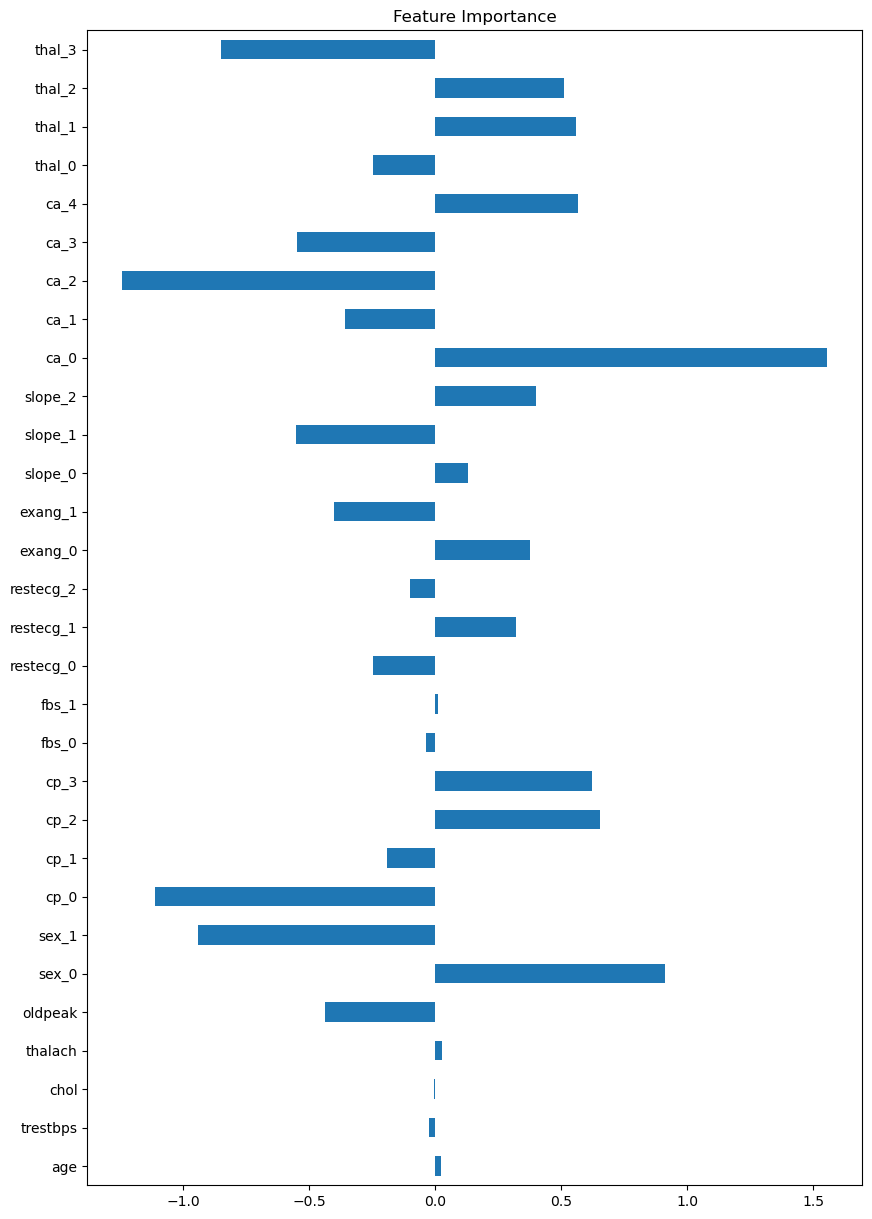

In [84]:
# Visualize the feature importance

feature_imp_df = pd.DataFrame(feature_dict, index=[0])
feature_imp_df.T.plot(kind="barh", figsize=(10,15), title = "Feature Importance", legend=False);